## Улучшение качества моеди. Продвинутые алгоритмы классификации.


* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Реализовать самостоятельно логистическую регрессию
    * Обучить ее методом градиентного спуска
    * Методом nesterov momentum
    * Методом rmsprop
* В качестве dataset'а взять Iris, оставив 2 класса:
    * Iris Versicolor
    * Iris Virginica

In [224]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
%matplotlib inline

In [2]:
iris_df = datasets.load_iris()
x = pd.DataFrame(iris_df.data,columns=iris_df.feature_names)
y = iris_df.target

Согласно заданию нужно оставить два типа цветка:Versicolor (1) и Virginica (2). Удалим значения соовтетсвующие типу 

In [3]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [153]:
X=x[y!=0]
Y=y[y!=0]
Y[Y==2]=0

In [154]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, stratify=Y)

In [227]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def get_h(x,w,b):
    return np.dot(w,x.T)+b 

def loss(x):
    m = x.shape[0]
    return 1/m*(np.sum())
 
def predict(x,w):
    return sigmoid(get_h(x,w,b))    

## Метод градиентного спуска

In [233]:
def gradien_descent(x,y,learning_rate,iterration):
    w =np.ones(x.shape[1])
    b = 0
    cost = []
    for i in range(iterration):
        probs = sigmoid(get_h(x,w,b))
        diff = probs - y
        w = w - learning_rate*np.dot(x.T,diff)/x.shape[1]   
        cost.append(np.mean(-y*np.log(sigmoid(get_h(x,w,b)))-(1-y)*np.log(sigmoid(1-get_h(x,w,b)))))        
    return w, cost

In [234]:
w,cost = gradien_descent(x_train,y_train,0.01,30000)

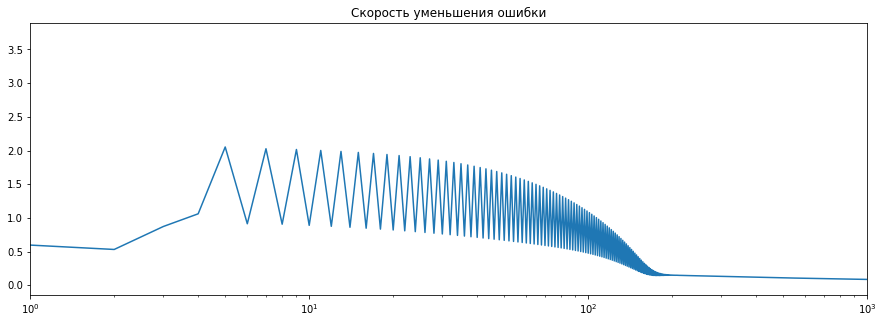

In [256]:
fig , ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(cost)
ax.set_xscale('log')
ax.set_xlim(0,1000)
ax.set_title('Скорость уменьшения ошибки')

In [232]:
confusion_matrix(np.round(predict(x_test,w)),y_test)

array([[10,  2],
       [ 0,  8]])

В целом неплохой результат.

## Метод nesterov momentum

In [267]:
def nesterov_momentum(x,y,learning_rate,iterration,gamma=0.95):
    w =np.ones(x.shape[1])
    b = 0
    cost = []
    grad_ = np.zeros(x_train.shape[1])
    for i in range(iterration):
        probs = sigmoid(get_h(x,w-gamma*grad_,b))
        diff = probs - y
        cost.append(np.mean(-y*np.log(sigmoid(get_h(x,w,b)))-(1-y)*np.log(sigmoid(1-get_h(x,w,b))))) 
        grad = gamma*grad_ + learning_rate*np.dot(x.T,diff)/x.shape[1] 
        w -= grad
        grad_ = grad
               
    return w, cost

In [268]:
w,cost = nesterov_momentum(x_train,y_train,0.01,30000)

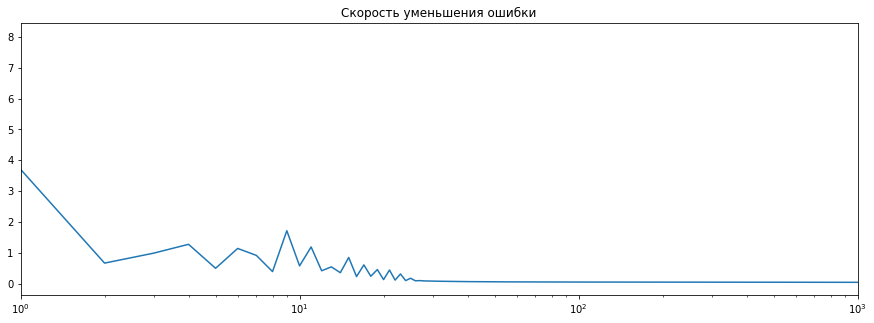

In [269]:
fig , ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(cost)
ax.set_xscale('log')
ax.set_xlim(0,1000)
ax.set_title('Скорость уменьшения ошибки')

In [270]:
confusion_matrix(np.round(predict(x_test,w)),y_test)

array([[10,  2],
       [ 0,  8]])

В этом методе нет таких сильных колебаний

## Методом rmsprop

In [292]:
def rmsprop(x,y,iterration,gamma=0.95, eps = 1e-8, eta=0.01):
    w =np.ones(x.shape[1])
    b = 0
    cost = []
    grad_ = np.zeros(x_train.shape[1])
    for i in range(iterration):
        diff = sigmoid(get_h(x,w,b)) - y        
        cost.append(np.mean(-y*np.log(sigmoid(get_h(x,w,b)))-(1-y)*np.log(sigmoid(1-get_h(x,w,b))))) 
        grad = np.dot(x.T,diff)/x.shape[1]
        grad2 = grad**2
        grad2_avg =gamma*grad_ +(1-gamma)*grad2 
        w -= eta/np.sqrt(grad2_avg+eps)*grad
        grad_ = grad2_avg
               
    return w, cost

In [305]:
w,cost = rmsprop(x_train,y_train,30000)

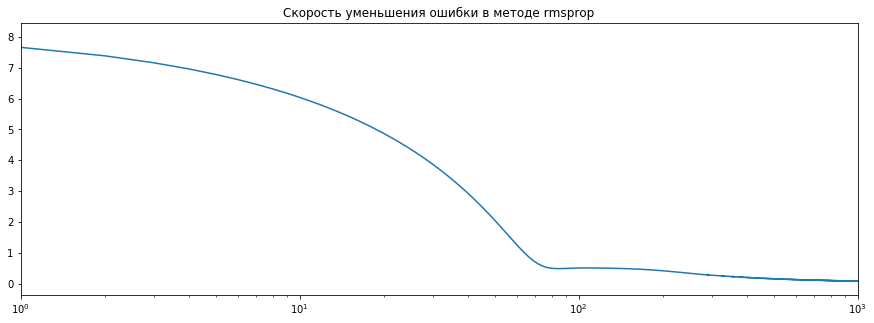

In [307]:
fig , ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(cost)
ax.set_xscale('log')
ax.set_xlim(0,1000)
ax.set_title('Скорость уменьшения ошибки в методе rmsprop')

In [308]:
confusion_matrix(np.round(predict(x_test,w)),y_test)

array([[10,  2],
       [ 0,  8]])

Наиболее плавный спуск